<a href="https://colab.research.google.com/github/EnzoGolfetti/praticas_python/blob/main/Kmeans_pr%C3%A1tico_Mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
%matplotlib inline

Fazer o tratamento do Dataset

In [ ]:
base_mercado = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
base_mercado.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exportando e usando o Pandas profilling

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 38.2MB 15.4MB/s
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 1.1MB 34.7MB/s 
     |████████████████████████████████| 3.2MB 33.5MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
     |████████████████████████████████| 296kB 52.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=dcf1c0a1ec4632d90ab0aa746926d8760b175b35d5778111a7d5ec5208db3952
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zkvqf12/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=237ee8dcf24b601f887e6dd4d4386dee872d455cf3b3d624e0b08767dc0f25ec
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(base_mercado, title='Relatório - PP')
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Podemos exportar esse relatório para salvá-lo e visualizar como page web

In [ ]:
profile.to_file('Mall_customers.html')

Aplicando o K-means

Text(0.5, 1.0, 'Relação renda - score')

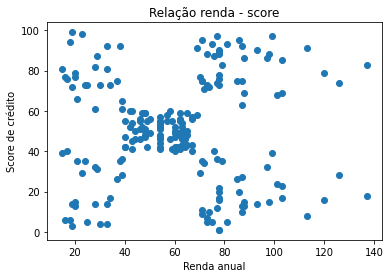

In [ ]:
plt.scatter(data=base_mercado, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.xlabel('Renda anual')
plt.ylabel('Score de crédito')
plt.title('Relação renda - score')

Text(0.5, 1.0, 'Relação Renda x Score')

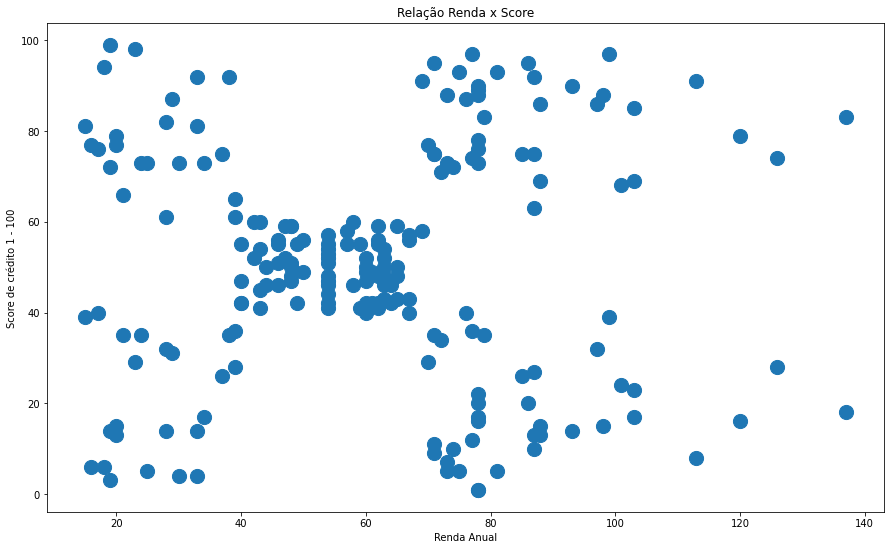

In [ ]:
x = base_mercado['Annual Income (k$)']
y = base_mercado['Spending Score (1-100)']

fig, ax  = plt.subplots(figsize=(15,9))
ax.scatter(x=x, y=y, s=200)
ax.set_xlabel('Renda Anual')
ax.set_ylabel('Score de crédito 1 - 100')
ax.set_title('Relação Renda x Score')

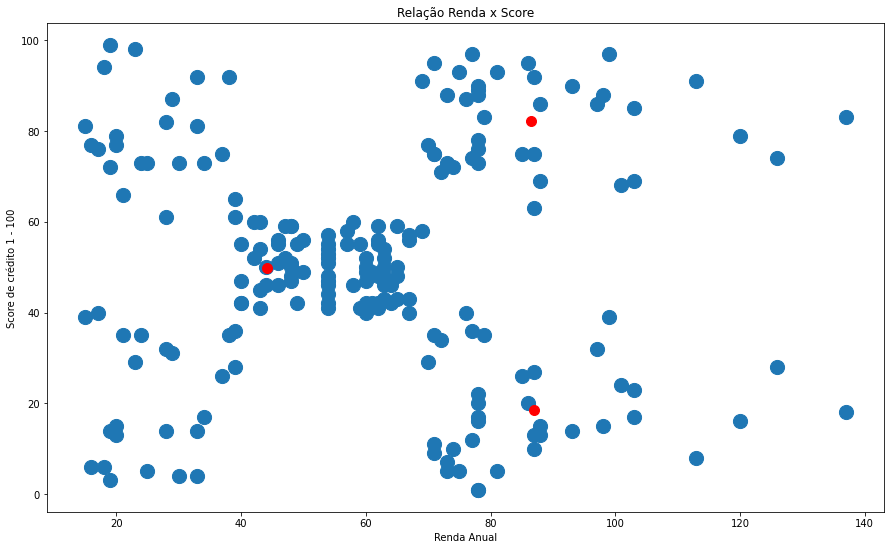

In [ ]:
X2 = base_mercado[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=1000)
pred_y = kmeans.fit_predict(X2)

fig, ax  = plt.subplots(figsize=(15,9))
ax.scatter(x=x, y=y, s=200)
ax.set_xlabel('Renda Anual')
ax.set_ylabel('Score de crédito 1 - 100')
ax.set_title('Relação Renda x Score')
ax.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=100, c='red') #plotando os pontos gerados pelo k-means (os três clusters)

Plotando o WCSS para verificar a quantidade correta de clusters

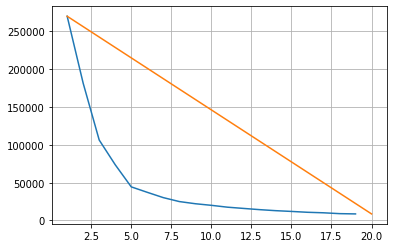

In [ ]:
wcss = []
for i in range (1,20): #usamos i justamente como váriavel da função Kmeans para saber o resultado de clusters corretamente
  kmeans2 = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000)
  kmeans2.fit(X2)
  wcss.append(kmeans2.inertia_) #o método inertia é o que calcula a soma dos quadrados

# linha do WCSS
plt.plot(range(1,20), wcss)
# linha para verificar a distância
plt.plot([1,20],[wcss[0], wcss[len(wcss)-1]])
plt.grid()

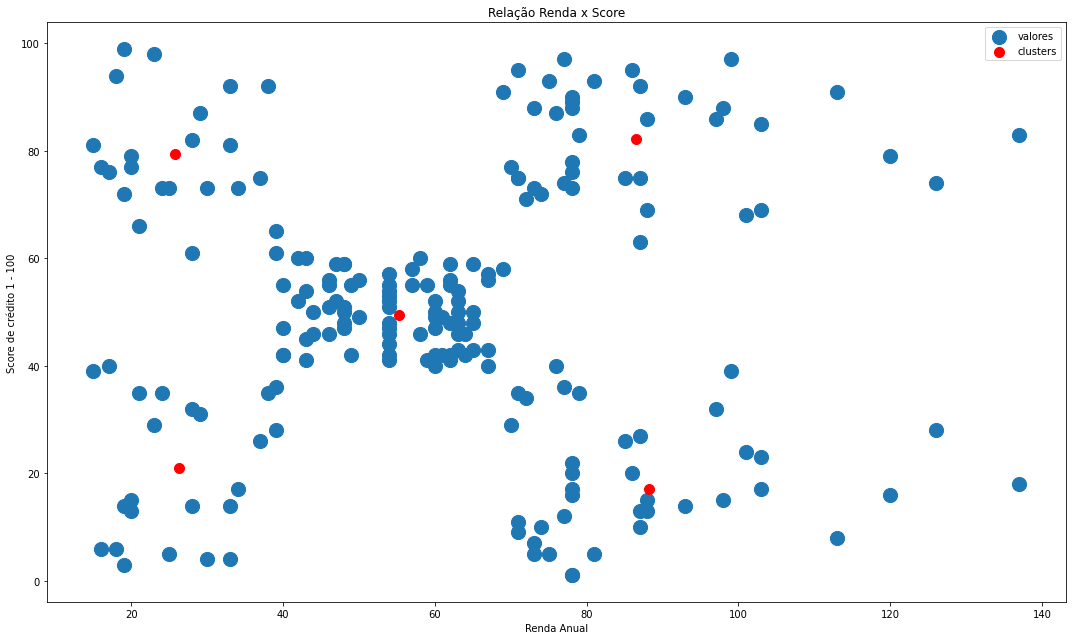

In [ ]:
X2 = base_mercado[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=1000)
pred_y = kmeans.fit_predict(X2)
# onde n_clusters é o número de clusters necessários
# init k-means++ é o padrão
# n_init=10 é o padrão também
# e max_iter= é o número de iterações que entendemos ser necessário para estabilizar os clusters
#fit_predict faz a previsão efetivamente na nossa base de dados

fig, ax  = plt.subplots(figsize=(15,9))
ax.scatter(x=x, y=y, s=200, label='valores')
ax.set_xlabel('Renda Anual')
ax.set_ylabel('Score de crédito 1 - 100')
ax.set_title('Relação Renda x Score')
ax.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:, 1], s=100, c='red', label='clusters') #plotando os pontos gerados pelo k-means (os três clusters)
plt.tight_layout()
ax.legend()

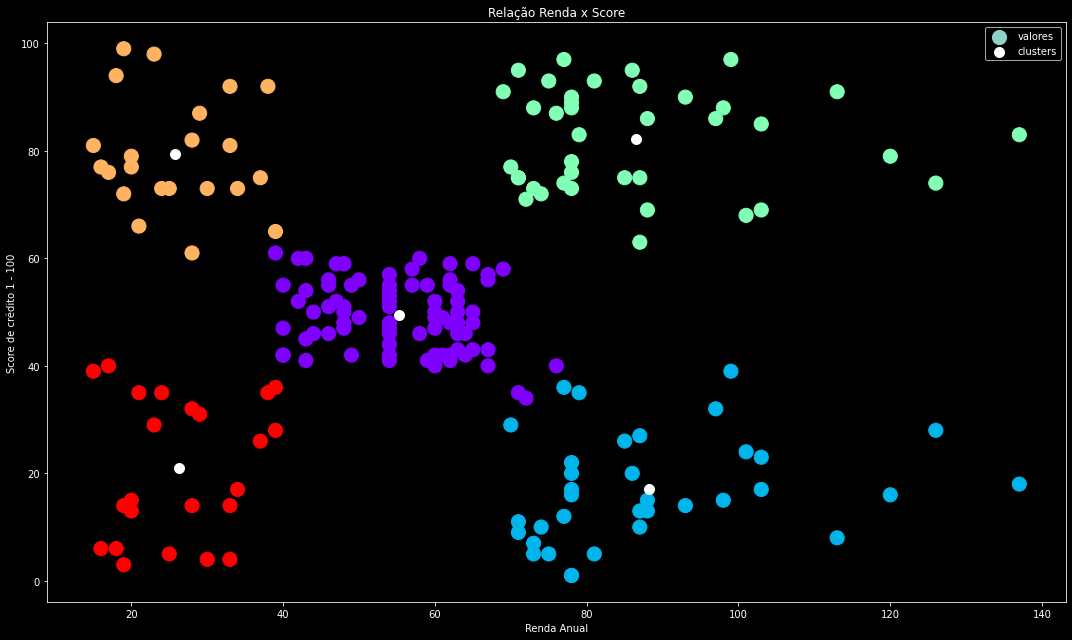

In [ ]:
X2 = base_mercado[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=1000)
pred_y = kmeans.fit_predict(X2)
# onde n_clusters é o número de clusters necessários
# init k-means++ é o padrão
# n_init=10 é o padrão também
# e max_iter= é o número de iterações que entendemos ser necessário para estabilizar os clusters
#fit_predict faz a previsão efetivamente na nossa base de dados

fig, ax  = plt.subplots(figsize=(15,9))
plt.style.use('dark_background') #brincando com estilos de gráficos
#visualizar os grupos separados por cores use o kmeans.labels_ na plotagem dos dados
ax.scatter(x=x, y=y, s=200, label='valores', c=kmeans.labels_, cmap='rainbow')
ax.set_xlabel('Renda Anual')
ax.set_ylabel('Score de crédito 1 - 100')
ax.set_title('Relação Renda x Score')
ax.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:, 1], s=100, c='white', label='clusters') #plotando os pontos gerados pelo k-means (os três clusters)
plt.tight_layout()
ax.legend()

Linear regression na base Mall Customers

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
base_mercado.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


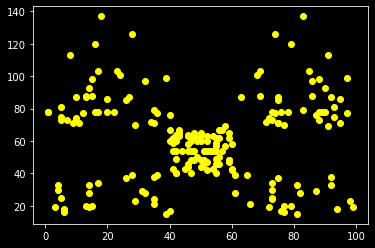

In [ ]:
income = np.array(base_mercado['Annual Income (k$)'])
score = np.array(base_mercado['Spending Score (1-100)'])
plt.scatter(score, income, c='yellow')

coefficient: /n [0.01007204]
conclusão: não há correlação entre income e score


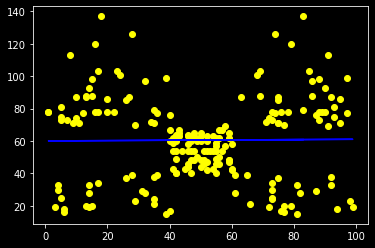

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(score.reshape(-1,1), income)
pred = regr.predict(score.reshape(-1,1))

plt.scatter(score, income, c='yellow')
plt.plot(score, pred, c='blue')

#adicionando a constante
score_c = sm.add_constant(score)
resultado = sm.OLS(income, score_c).fit()
resultado.summary()

print('coefficient: /n', regr.coef_)
print('conclusão: não há correlação entre income e score')